In [1]:
pip install lazypredict


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

In [3]:
df=pd.read_csv('/content/train.csv')

In [4]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.00,NaN,360.00,1.00,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.00,128.00,360.00,1.00,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.00,66.00,360.00,1.00,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.00,120.00,360.00,1.00,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.00,141.00,360.00,1.00,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.00,71.00,360.00,1.00,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.00,40.00,180.00,1.00,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.00,253.00,360.00,1.00,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.00,187.00,360.00,1.00,Urban,Y


In [5]:
# from tensorflow.keras import *
# from tensorflow.keras.utils import to_categorical
# to_categorical(df['Gender'])

In [6]:
# Preprocessing

In [7]:
# missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
missing_values = df.isnull()
rows_with_missing_values = df[df.isnull().any(axis=1)]
rows_without_missing_values = df.dropna()
columns_with_missing_values = df.loc[:, df.isnull().any()]
columns_without_missing_values = df.loc[:, df.notnull().all()]

In [9]:
df.fillna(method='ffill',axis=1).isnull().sum()

df1=df.fillna(method='ffill',axis=1)

In [10]:
mode_gender=df['Gender'].value_counts().index[0]
mode_gender

'Male'

In [11]:
df['Gender'].fillna(mode_gender,inplace=True)
df['Gender'].isnull().sum()

0

In [12]:
gender_without_null=[]
for item in df['Gender']:
  if item==np.nan:
    gender_without_null.append(mode_gender)
  else:
    gender_without_null.append(item)

df['Gender']=gender_without_null

In [13]:
# One Hot

In [14]:
df.drop(columns='Loan_ID',inplace=True)

In [15]:
pd.get_dummies(df).columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Loan_Status_N', 'Loan_Status_Y'],
      dtype='object')

In [16]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [17]:
target=df['Loan_Status']
df1=df.drop(columns=['Dependents','Loan_Status'])

In [18]:
temp=[]
for item in target:
  if item=='Y':
    temp.append(1)
  else:
    temp.append(0)

df1['target']=temp

In [19]:
df2=pd.get_dummies(df1)
df2

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,target,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.00,NaN,360.00,1.00,1,False,True,True,False,True,False,True,False,False,False,True
1,4583,1508.00,128.00,360.00,1.00,0,False,True,False,True,True,False,True,False,True,False,False
2,3000,0.00,66.00,360.00,1.00,1,False,True,False,True,True,False,False,True,False,False,True
3,2583,2358.00,120.00,360.00,1.00,1,False,True,False,True,False,True,True,False,False,False,True
4,6000,0.00,141.00,360.00,1.00,1,False,True,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.00,71.00,360.00,1.00,1,True,False,True,False,True,False,True,False,True,False,False
610,4106,0.00,40.00,180.00,1.00,1,False,True,False,True,True,False,True,False,True,False,False
611,8072,240.00,253.00,360.00,1.00,1,False,True,False,True,True,False,True,False,False,False,True
612,7583,0.00,187.00,360.00,1.00,1,False,True,False,True,True,False,True,False,False,False,True


 # Handle the Data on Dependents column
# Data cleaning

In [20]:
# Drop Gender_Male
df2.drop(columns=['Gender_Male','Married_No','Education_Not Graduate','Self_Employed_No'])

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,target,Gender_Female,Married_Yes,Education_Graduate,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.00,NaN,360.00,1.00,1,False,False,True,False,False,False,True
1,4583,1508.00,128.00,360.00,1.00,0,False,True,True,False,True,False,False
2,3000,0.00,66.00,360.00,1.00,1,False,True,True,True,False,False,True
3,2583,2358.00,120.00,360.00,1.00,1,False,True,False,False,False,False,True
4,6000,0.00,141.00,360.00,1.00,1,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.00,71.00,360.00,1.00,1,True,False,True,False,True,False,False
610,4106,0.00,40.00,180.00,1.00,1,False,True,True,False,True,False,False
611,8072,240.00,253.00,360.00,1.00,1,False,True,True,False,False,False,True
612,7583,0.00,187.00,360.00,1.00,1,False,True,True,False,False,False,True


In [21]:
corr_matrix  = df2.corr()


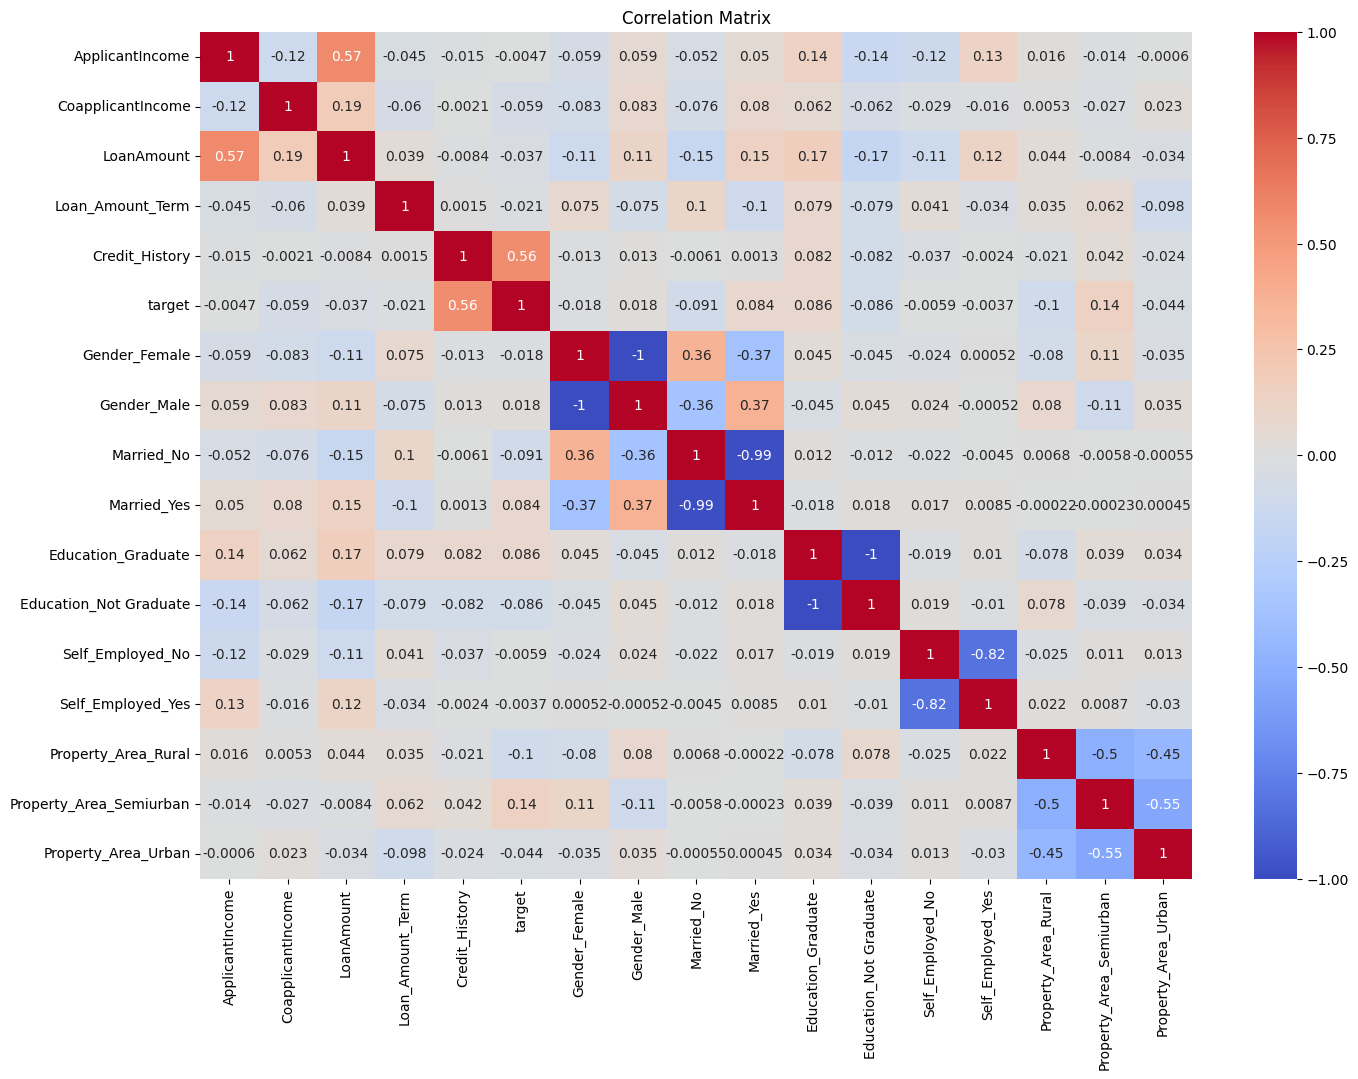

In [22]:
plt.figure(figsize=(16, 11))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.savefig('Correlation Matrix.png')
plt.show()

In [23]:
# missing values
df2.isnull().sum()

ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
target                      0
Gender_Female               0
Gender_Male                 0
Married_No                  0
Married_Yes                 0
Education_Graduate          0
Education_Not Graduate      0
Self_Employed_No            0
Self_Employed_Yes           0
Property_Area_Rural         0
Property_Area_Semiurban     0
Property_Area_Urban         0
dtype: int64

In [24]:
# Fill Null

for item in df2.columns:

    temp = df2[item].mode()[0]

    df2[item].fillna(temp, inplace=True)


In [25]:
# missing values
df2.isnull().sum()


ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
target                     0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

# Class Imbalancement Checking

In [26]:
# Count the number of samples of each class for each column
class_counts_1 = df2['ApplicantIncome'].value_counts()
print(class_counts_1)
class_counts_2 = df2['CoapplicantIncome'].value_counts()
print(class_counts_2)
class_counts_3 = df2['LoanAmount'].value_counts()
print(class_counts_3)
class_counts_4 = df2['Loan_Amount_Term'].value_counts()
print(class_counts_4)
class_counts_5 = df2['Credit_History'].value_counts()
print(class_counts_5)
class_counts_6 = df2['target'].value_counts()
print(class_counts_6)
class_counts_7 = df2['Gender_Female'].value_counts()
print(class_counts_7)
class_counts_8 = df2['Married_Yes'].value_counts()
print(class_counts_8)
class_counts_9 = df2['Education_Graduate'].value_counts()
print(class_counts_9)
class_counts_10 = df2['Self_Employed_Yes'].value_counts()
print(class_counts_10)
class_counts_11= df2['Property_Area_Rural'].value_counts()
print(class_counts_11)
class_counts_12 = df2['Property_Area_Semiurban'].value_counts()
print(class_counts_12)
class_counts_13 = df2['Property_Area_Urban'].value_counts()
print(class_counts_13)

ApplicantIncome
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: count, Length: 505, dtype: int64
CoapplicantIncome
0.00       273
2500.00      5
2083.00      5
1666.00      5
2250.00      3
          ... 
2791.00      1
1010.00      1
1695.00      1
2598.00      1
240.00       1
Name: count, Length: 287, dtype: int64
LoanAmount
120.00    42
110.00    17
100.00    15
160.00    12
187.00    12
          ..
240.00     1
214.00     1
59.00      1
166.00     1
253.00     1
Name: count, Length: 203, dtype: int64
Loan_Amount_Term
360.00    526
180.00     44
480.00     15
300.00     13
240.00      4
84.00       4
120.00      3
60.00       2
36.00       2
12.00       1
Name: count, dtype: int64
Credit_History
1.00    525
0.00     89
Name: count, dtype: int64
target
1    422
0    192
Name: count, dtype: int64
Gender_Female
False    502
True     112
Name: count, dtype: int64
Married_Yes
True     398
False    216
Name: count, dtyp

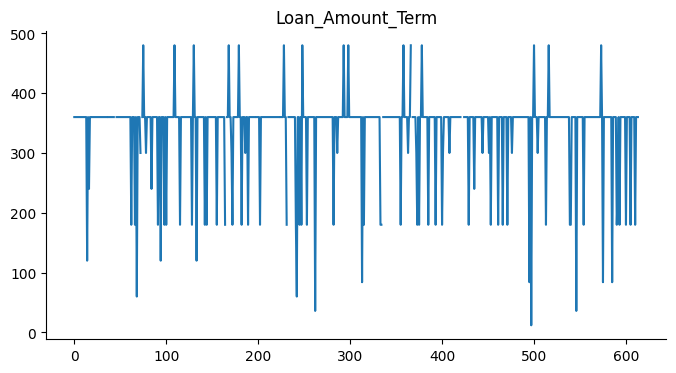

In [27]:
from matplotlib import pyplot as plt
df['Loan_Amount_Term'].plot(kind='line', figsize=(8, 4), title='Loan_Amount_Term')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.savefig('Loan_Amount_Term.png')

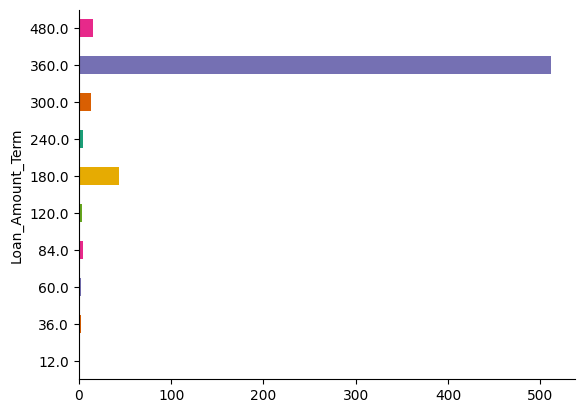

In [28]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Loan_Amount_Term').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.savefig('Loan_Amount_Term2.png')

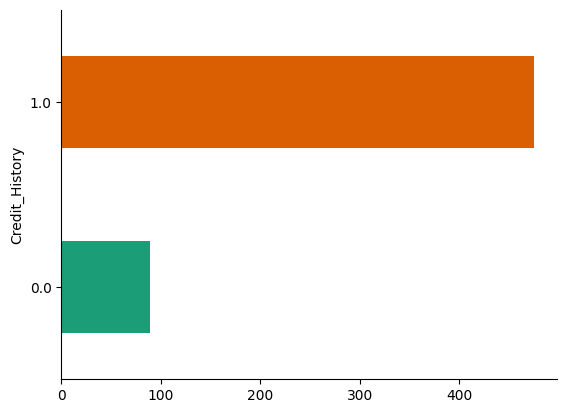

In [29]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Credit_History').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.savefig('Credit_History.png')

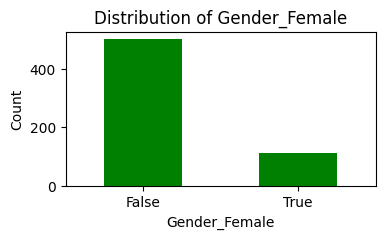

In [30]:
gender_counts = df2['Gender_Female'].value_counts()

plt.figure(figsize=(4, 2))
gender_counts.plot(kind='bar', rot=0, color = 'g')
plt.xlabel('Gender_Female')
plt.ylabel('Count')
plt.title('Distribution of Gender_Female')
plt.savefig('Gender_Female.png')
plt.show()


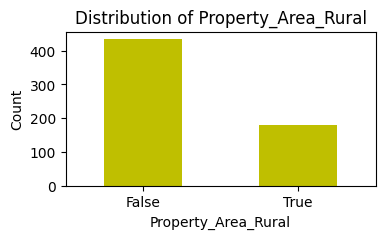

In [36]:
Property_Area_Rural = df2['Property_Area_Rural'].value_counts()

plt.figure(figsize=(4, 2))
Property_Area_Rural.plot(kind='bar', rot=0, color = 'y')
plt.xlabel('Property_Area_Rural')
plt.ylabel('Count')
plt.title('Distribution of Property_Area_Rural')
plt.savefig('Property_Area_Rural.png')
plt.show()


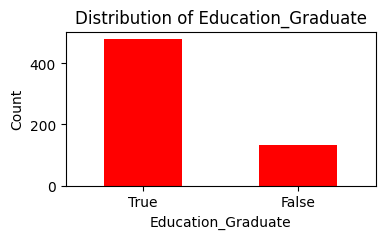

In [37]:
Education_Graduate = df2['Education_Graduate'].value_counts()

plt.figure(figsize=(4, 2))
Education_Graduate.plot(kind='bar', rot=0, color = 'r')
plt.xlabel('Education_Graduate')
plt.ylabel('Count')
plt.title('Distribution of Education_Graduate')
plt.savefig('Education_Graduate.png')
plt.show()


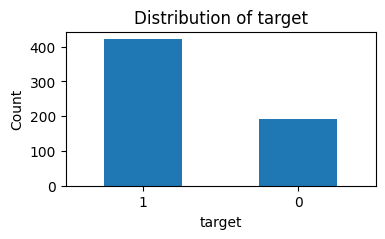

In [38]:
target = df2['target'].value_counts()

plt.figure(figsize=(4, 2))
target.plot(kind='bar', rot=0)
plt.xlabel('target')
plt.ylabel('Count')
plt.title('Distribution of target')
plt.savefig('target.png')
plt.show()


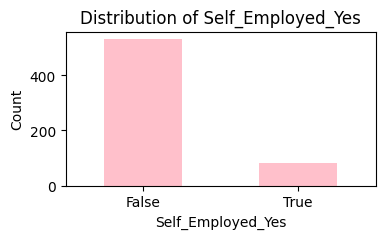

In [41]:

Self_Employed_Yes = df2['Self_Employed_Yes'].value_counts()

plt.figure(figsize=(4, 2))
Self_Employed_Yes.plot(kind='bar', rot=0, color = 'pink')
plt.xlabel('Self_Employed_Yes')
plt.ylabel('Count')
plt.title('Distribution of Self_Employed_Yes')
plt.savefig('Self_Employed_Yes.png')
plt.show()


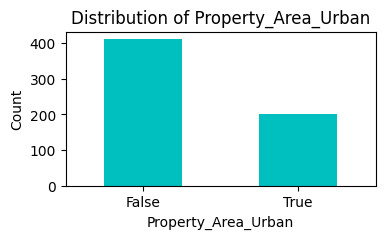

In [43]:
Property_Area_Urban = df2['Property_Area_Urban'].value_counts()

plt.figure(figsize=(4, 2))
Property_Area_Urban.plot(kind='bar', rot=0, color = 'c')
plt.xlabel('Property_Area_Urban')
plt.ylabel('Count')
plt.title('Distribution of Property_Area_Urban')
plt.savefig('Property_Area_Urban.png')
plt.show()


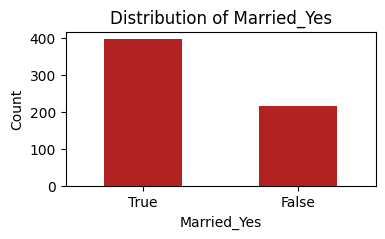

In [47]:
Married_Yes = df2['Married_Yes'].value_counts()

plt.figure(figsize=(4, 2))
Married_Yes.plot(kind='bar', rot=0, color = 'firebrick')
plt.xlabel('Married_Yes')
plt.ylabel('Count')
plt.title('Distribution of Married_Yes')
plt.savefig('Married_Yes.png')
plt.show()


# Standardization (Mean = 0, Var = 1)

# Normalization, (MinMax: between 0 and 1)

In [ ]:
X = df2.drop(columns=['target'])
y = df2['target']

In [ ]:
# Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled_Std = scaler.fit_transform(X)
X_scaled_Std[4]

array([ 0.09772844, -0.55448733, -0.05309323,  0.2732313 ,  0.41173269,
       -0.47234264,  0.47234264,  1.37208932, -1.3574213 ,  0.52836225,
       -0.52836225,  0.47749346, -0.39260074, -0.64147818, -0.7820157 ,
        1.42814704])

In [ ]:
# Normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled_N = scaler.fit_transform(X)
X_scaled_N[4]

array([0.07235622, 0.        , 0.1910275 , 0.74358974, 1.        ,
       0.        , 1.        , 1.        , 0.        , 1.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       1.        ])

# Split to Train and Test

In [ ]:
#  %80 Train, %20 Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print(f"X_train shape: {X_train.shape} \t X_test shape:{X_test.shape} \t y_train shape: {y_train.shape} \t y_test shape: {y_test.shape}")


X_train shape: (491, 16) 	 X_test shape:(123, 16) 	 y_train shape: (491,) 	 y_test shape: (123,)


# Modeling (LazyPrediction)

In [ ]:
# Model  Lazy Classifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [00:01<00:00, 20.06it/s]

[LightGBM] [Info] Number of positive: 338, number of negative: 153
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.688391 -> initscore=0.792608
[LightGBM] [Info] Start training from score 0.792608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

model_1 = LogisticRegression()

model_1.fit(X_train, y_train)

predictions_1 = model_1.predict(X_test)

Accuracy_1 = accuracy_score(y_test, predictions_1)
print(f'Accuracy_1: {Accuracy_1}')

report_1 = classification_report(y_test, predictions_1)
print('Classification Report_1:\n', report_1)


Accuracy_1: 0.7967479674796748
Classification Report_1:
               precision    recall  f1-score   support

           0       0.82      0.46      0.59        39
           1       0.79      0.95      0.86        84

    accuracy                           0.80       123
   macro avg       0.81      0.71      0.73       123
weighted avg       0.80      0.80      0.78       123



In [ ]:
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

model_2 = NearestCentroid()

model_2.fit(X_train, y_train)

predictions_2 = model_2.predict(X_test)

Accuracy_2 = accuracy_score(y_test, predictions_2)
print(f'Accuracy_2: {Accuracy_2}')

Report_2 = classification_report(y_test, predictions_2)
print('Classification Report_2:\n', Report_2)


Accuracy_2: 0.4959349593495935
Classification Report_2:
               precision    recall  f1-score   support

           0       0.19      0.18      0.18        39
           1       0.63      0.64      0.64        84

    accuracy                           0.50       123
   macro avg       0.41      0.41      0.41       123
weighted avg       0.49      0.50      0.49       123



In [ ]:
from sklearn.linear_model import Perceptron

model_3 = Perceptron(max_iter=1000, eta0=0.01)

model_3.fit(X_train, y_train)

predictions_3 = model_3.predict(X_test)

Accuracy_3 = accuracy_score(y_test, predictions_3)
print(f'Accuracy_3: {Accuracy_3}')

Report_3 = classification_report(y_test, predictions_3)
print('Classification Report_3:\n', Report_3)


Accuracy_3: 0.5284552845528455
Classification Report_3:
               precision    recall  f1-score   support

           0       0.33      0.46      0.38        39
           1       0.69      0.56      0.62        84

    accuracy                           0.53       123
   macro avg       0.51      0.51      0.50       123
weighted avg       0.58      0.53      0.54       123



In [ ]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# model_4 = LinearDiscriminantAnalysis()

# model_4.fit(X_train, y_train)

# predictions_4 = model_4.predict(X_test)

# Accuracy_4 = accuracy_score(y_test, predictions_4)
# print(f'Accuracy_4: {Accuracy_4}')

# Report_4 = classification_report(y_test, predictions)
# print('Classification Report_4:\n', Report_4)


In [ ]:
from sklearn.naive_bayes import BernoulliNB

model_5 = BernoulliNB()

model_5.fit(X_train, y_train)

predictions_5 = model_5.predict(X_test)

accuracy_5 = accuracy_score(y_test, predictions_5)
print(f'Accuracy_5: {accuracy_5}')

report_5 = classification_report(y_test, predictions_5)
print('Classification Report_5:\n', report_5)


Accuracy_5: 0.8292682926829268
Classification Report_5:
               precision    recall  f1-score   support

           0       0.85      0.56      0.68        39
           1       0.82      0.95      0.88        84

    accuracy                           0.83       123
   macro avg       0.84      0.76      0.78       123
weighted avg       0.83      0.83      0.82       123



In [ ]:
# from sklearn.calibration import CalibratedClassifierCV
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report
# from sklearn.svm import LinearSVC

# base_model = LinearSVC()

# calibrated_model = CalibratedClassifierCV(base_model, method='sigmoid')          #  method='isotonic'

# calibrated_model.fit(X_train, y_train)

# predictions_6 = calibrated_model.predict(X_test)

# Accuracy_6 = accuracy_score(y_test, predictions_6)
# print(f'Accuracy_6: {Accuracy_6}')

# Report_6 = classification_report(y_test, predictions)
# print('Classification Report_6:\n', Report_6)


# Metrics

In [ ]:
from sklearn.metrics import confusion_matrix

predictions_7 = model_4.predict(X_test)

conf_matrix = confusion_matrix(y_test, predictions_7)

print('Confusion Matrix:')
print(conf_matrix)


Confusion Matrix:
[[22 17]
 [ 0 84]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]


Accuracy = TP+TN / (TP+TN + FP+FN)
print(f'Accuracy: {Accuracy}')

Specificity = TN / (TN + FP)
print(f'Specificity: {Specificity}')

Precision = TP / (TP + FP)
print(f'Precision: {Precision}')

Recall = TP / (TP + FN)
print(f'Recall: {Recall}')

f1score = 2*TP / (2*TP +FP+ FN)

print("F1-score:", f1score)

Accuracy: 84.17886178861788
Specificity: 0.5641025641025641
Precision: 0.8316831683168316
Recall: 1.0
F1-score: 0.9081081081081082


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model_8= LinearRegression()

model_8.fit(X_train, y_train)

predictions_8 = model_8.predict(X_test)

# Metrics
MSE = mean_squared_error(y_test, predictions_8)
R2 = r2_score(y_test, predictions_8)
MAE = mean_absolute_error(y_test, predictions_8)
RMSE = mean_squared_error(y_test, predictions_8, squared=False)


print(f'Mean Squared Error (MSE): {MSE} \t\t Root Mean Squared Error (RMSE): {RMSE}')
print(f'Mean Absolute Error (MAE): {MAE} \t \t R-squared (R2): \t {R2}')


Mean Squared Error (MSE): 0.1207438708419199 		 Root Mean Squared Error (RMSE): 0.3474821878052455
Mean Absolute Error (MAE): 0.27450854687203236 	 	 R-squared (R2): 	 0.4423888821833314


# Ploting

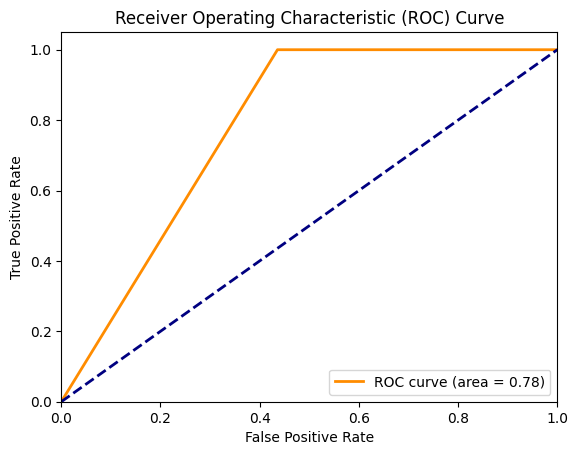

In [ ]:
#   (Receiver Operating Characteristic) ROC for FP Rate, TP Rate

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


FPr, TPr, thresholds = roc_curve(y_test,predictions_7)

#  AUC
ROC_AUC = auc(FPr, TPr)

# Plot ROC
plt.figure()
plt.plot(FPr, TPr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % ROC_AUC)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('ROC.png')
plt.show()


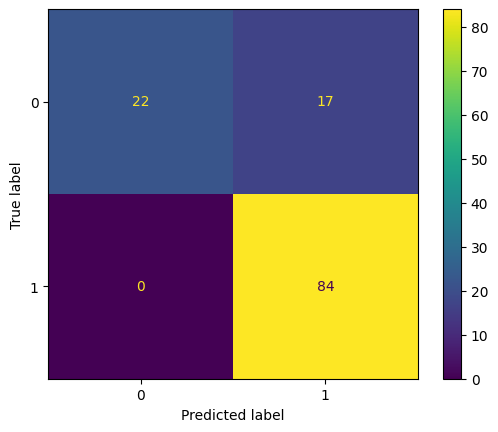

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix)
disp.plot()
plt.savefig('conf_matrix.png')
plt.show()
